# <center> People Analytic (BRI Hackathon 2021)

## Business Understanding

The use of Machine Learning can enable the decision makers on Human Resource Department to predict the employee performances for one year ahead by using the KPI historical data owned by the company. Hence, we need a various model of machine learning in order to implement the employee performance prediction accurately.

**Hence, our goals is :**
 - Make a prediction using machine learning so we can classify them (employees) which one has the best performance and not by using the provided dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r"C:\Users\Dimas AR\Desktop\Data Science\BRI Hackathon - People Analytic\train_old.csv")
test = pd.read_csv(r"C:\Users\Dimas AR\Desktop\Data Science\BRI Hackathon - People Analytic\test_old.csv")
print("Train Shape: ", train.shape)
print("Test Shape: ", test.shape)

Train Shape:  (22005, 30)
Test Shape:  (6000, 29)


## Data Understanding

In [3]:
train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,11,2,1,1,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22005 entries, 0 to 22004
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              22005 non-null  object 
 1   job_duration_in_current_job_level      22005 non-null  float64
 2   person_level                           22005 non-null  object 
 3   job_duration_in_current_person_level   22005 non-null  float64
 4   job_duration_in_current_branch         22005 non-null  float64
 5   Employee_type                          21993 non-null  object 
 6   Employee_status                        22005 non-null  object 
 7   gender                                 22005 non-null  object 
 8   age                                    22005 non-null  int64  
 9   marital_status_maried(Y/N)             22005 non-null  object 
 10  number_of_dependences                  22005 non-null  int64  
 11  nu

In [5]:
train.isnull().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                              12
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                          3608
GPA                                      3503
year_graduated                           3503
job_duration_as_permanent_worker         2055
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                      

From the first checking, we can see that the data actually in improper format for several columns and consists of many missing values with a large count. So the next step is prepare the data into a proper look.

## Data Preparation

In this phase, I will do a lot of data cleansing and another method to make the dataset in a proper format for machine learning modelling

### Data Check #1

Main Concern : Employee_type, Employee_status, achievement_target_1, achievement_target_2, achievement_target_3

In [6]:
train['Best Performance'].value_counts()

0    19337
1     2668
Name: Best Performance, dtype: int64

In [7]:
train["Employee_type"].value_counts()

RM_type_A    11030
RM_type_B    10211
RM_type_C      752
Name: Employee_type, dtype: int64

In [8]:
train["Employee_status"].value_counts()

Permanent    19950
Contract      2055
Name: Employee_status, dtype: int64

Since the contract status has a possibility for not get a contact extending in one year ahead, I can consider this value is not give any impact for the model execution. So i decide to drop it. 

In [9]:
train = train[train.Employee_status != "Contract"]
train = train.drop('Employee_status', axis=1)
test = test.drop('Employee_status', axis=1)

In [10]:
train['achievement_target_1'].value_counts()

achiev_50%-100%           7679
achiev_100%-150%          2519
achiev_< 50%              2065
Pencapaian 50%-100%       1531
achiev_> 1.5               597
Pencapaian 100%-150%       485
Tidak diberikan target     178
Pencapaian < 50%           175
Pencapaian > 1.5            49
Name: achievement_target_1, dtype: int64

Look at those all messy format! I can't imagine how it would impact our model later. It is such a responsibility to fix the writing format. 

### Typo Fixing

In [11]:
train['achievement_target_1'] = train['achievement_target_1'].replace(['achiev_50%-100%'], 'Pencapaian 50-100')
train['achievement_target_1'] = train['achievement_target_1'].replace(['achiev_100%-150%'], 'Pencapaian 100-150')
train['achievement_target_1'] = train['achievement_target_1'].replace(['achiev_< 50%'], 'Pencapaian 50')
train['achievement_target_1'] = train['achievement_target_1'].replace(['achiev_> 1.5'], 'Pencapaian 15')
train['achievement_target_1'] = train['achievement_target_1'].replace(['Pencapaian 50%-100%'], 'Pencapaian 50-100')
train['achievement_target_1'] = train['achievement_target_1'].replace(['Pencapaian 100%-150%'], 'Pencapaian 100-150')
train['achievement_target_1'] = train['achievement_target_1'].replace(['Pencapaian < 50%'], 'Pencapaian 50')
train['achievement_target_1'] = train['achievement_target_1'].replace(['Pencapaian > 1.5'], 'Pencapaian 15')
train['achievement_target_1'] = train['achievement_target_1'].replace(np.nan, 'Tidak diberikan target')

train['achievement_target_2'] = train['achievement_target_2'].replace(['achiev_50%-100%'], 'Pencapaian 50-100')
train['achievement_target_2'] = train['achievement_target_2'].replace(['achiev_100%-150%'], 'Pencapaian 100-150')
train['achievement_target_2'] = train['achievement_target_2'].replace(['achiev_< 50%'], 'Pencapaian 50')
train['achievement_target_2'] = train['achievement_target_2'].replace(['achiev_> 1.5'], 'Pencapaian 15')
train['achievement_target_2'] = train['achievement_target_2'].replace(['Pencapaian 50%-100%'], 'Pencapaian 50-100')
train['achievement_target_2'] = train['achievement_target_2'].replace(['Pencapaian 100%-150%'], 'Pencapaian 100-150')
train['achievement_target_2'] = train['achievement_target_2'].replace(['Pencapaian < 50%'], 'Pencapaian 50')
train['achievement_target_2'] = train['achievement_target_2'].replace(['Pencapaian > 1.5'], 'Pencapaian 15')
train['achievement_target_2'] = train['achievement_target_2'].replace(np.nan, 'Tidak diberikan target')

train['achievement_target_3'] = train['achievement_target_3'].replace(['not reached'], 'not_reached')
train['achievement_target_3'] = train['achievement_target_3'].replace(np.nan, 'NONE')


test['achievement_target_1'] = test['achievement_target_1'].replace(['achiev_50%-100%'], 'Pencapaian 50-100')
test['achievement_target_1'] = test['achievement_target_1'].replace(['achiev_100%-150%'], 'Pencapaian 100-150')
test['achievement_target_1'] = test['achievement_target_1'].replace(['achiev_< 50%'], 'Pencapaian 50')
test['achievement_target_1'] = test['achievement_target_1'].replace(['achiev_> 1.5'], 'Pencapaian 15')
test['achievement_target_1'] = test['achievement_target_1'].replace(['Pencapaian 50%-100%'], 'Pencapaian 50-100')
test['achievement_target_1'] = test['achievement_target_1'].replace(['Pencapaian 100%-150%'], 'Pencapaian 100-150')
test['achievement_target_1'] = test['achievement_target_1'].replace(['Pencapaian < 50%'], 'Pencapaian 50')
test['achievement_target_1'] = test['achievement_target_1'].replace(['Pencapaian > 1.5'], 'Pencapaian 15')
test['achievement_target_1'] = test['achievement_target_1'].replace(np.nan, 'Tidak diberikan target')

test['achievement_target_2'] = test['achievement_target_2'].replace(['achiev_50%-100%'], 'Pencapaian 50-100')
test['achievement_target_2'] = test['achievement_target_2'].replace(['achiev_100%-150%'], 'Pencapaian 100-150')
test['achievement_target_2'] = test['achievement_target_2'].replace(['achiev_< 50%'], 'Pencapaian 50')
test['achievement_target_2'] = test['achievement_target_2'].replace(['achiev_> 1.5'], 'Pencapaian 15')
test['achievement_target_2'] = test['achievement_target_2'].replace(['Pencapaian 50%-100%'], 'Pencapaian 50-100')
test['achievement_target_2'] = test['achievement_target_2'].replace(['Pencapaian 100%-150%'], 'Pencapaian 100-150')
test['achievement_target_2'] = test['achievement_target_2'].replace(['Pencapaian < 50%'], 'Pencapaian 50')
test['achievement_target_2'] = test['achievement_target_2'].replace(['Pencapaian > 1.5'], 'Pencapaian 15')
test['achievement_target_2'] = test['achievement_target_2'].replace(np.nan, 'Tidak diberikan target')

test['achievement_target_3'] = test['achievement_target_3'].replace(['not reached'], 'not_reached')
test['achievement_target_3'] = test['achievement_target_3'].replace(np.nan, 'NONE')

In [12]:
train.isnull().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                              12
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                          3602
GPA                                      3503
year_graduated                           3503
job_duration_as_permanent_worker            0
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                                0
sick_leaves                       

The early main concern columns is already fixed on both writing and the missing values. So, the rest is to handle the remaining missing values on another columns!

## Handling Missing Values #1

I will proceed with **Avg_achievement_%**, **last_achievement_%**, and **Achievement_above_100%_during3quartal** columns

In [13]:
train["Achievement_above_100%_during3quartal"].value_counts()

0.0    10677
3.0     2237
1.0     1564
2.0     1225
Name: Achievement_above_100%_during3quartal, dtype: int64

In [14]:
train["Avg_achievement_%"].value_counts()

20.000000     314
13.000000      59
16.666667      29
10.000000      27
13.333333      15
             ... 
74.906667       1
95.906667       1
28.833333       1
99.343333       1
100.806667      1
Name: Avg_achievement_%, Length: 12186, dtype: int64

In [15]:
train["Last_achievement_%"].value_counts()

20.00     376
13.00      70
10.00      31
117.00     17
62.56       9
         ... 
38.59       1
55.20       1
114.66      1
56.99       1
109.59      1
Name: Last_achievement_%, Length: 7047, dtype: int64

In [16]:
train[["Avg_achievement_%","Last_achievement_%","Achievement_above_100%_during3quartal"]].describe()

,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal
count,15716.000000,15703.000000,15703.000000
mean,66.344676,71.420847,0.682991
std,23.253675,24.095520,1.107861
min,0.000000,4.260000,0.000000
25%,51.675000,55.935000,0.000000
50%,66.310833,71.410000,0.000000
75%,81.930833,88.350000,1.000000
max,129.010000,130.000000,3.000000


So from our diagnose, the **Avg_achievement_%** and **last_achievement_%** columns has a lot of unique values meanwhile for the **Achievement_above_100%_during3quartal** column only has a few values. My decision is to replace the null values using mean for the redundant columns and median for the column with few unique values.

## Fill missing values #1

In [17]:
train['Avg_achievement_%'] = train['Avg_achievement_%'].fillna(train['Avg_achievement_%'].mean())
train['Last_achievement_%'] = train['Last_achievement_%'].fillna(train['Last_achievement_%'].mean())
train['Achievement_above_100%_during3quartal'] = train['Achievement_above_100%_during3quartal'].fillna(train['Achievement_above_100%_during3quartal'].median())

In [18]:
train.isnull().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                              12
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                          3602
GPA                                      3503
year_graduated                           3503
job_duration_as_permanent_worker            0
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                                0
sick_leaves                       

The null values for first data cleansing is successfully handled.

## Handling Missing Values #2

In [19]:
train["GPA"].value_counts()

0.00     3606
3.00      499
3.01      318
3.14      262
3.10      262
         ... 
4.19        1
8.69        1
8.29        1
36.30       1
32.12       1
Name: GPA, Length: 240, dtype: int64

In [20]:
train["year_graduated"].value_counts()

2011    2152
2013    2142
2012    2019
2010    1804
2014    1628
2009    1336
2008    1163
2007     700
2015     609
2006     432
0        368
2005     314
2004     295
2003     252
2016     202
2002     198
2001     122
2017     104
\N        87
2000      71
9999      66
1999      42
1996      41
1998      35
1995      32
1994      27
2018      25
1993      22
1992      18
2999      17
1997      15
1987      15
1991      13
1988      12
1990      11
1989      10
1986       8
1985       8
2201       5
2019       5
-          4
2200       3
1983       3
____       2
201        2
1984       2
3016       1
2044       1
9464       1
2020       1
2031       1
102        1
Name: year_graduated, dtype: int64

In [21]:
train["Education_level"].value_counts()

level_4    13569
level_3     2503
level_1      191
level_5       61
level_0       16
level_2        8
Name: Education_level, dtype: int64

In [22]:
#GPA angkanya gak jelas, year_graduated juga, banyak juga yang miss mending drop aja
train = train.drop('year_graduated', axis=1)
test = test.drop('year_graduated', axis=1)

In [23]:
# Replacing the null values in "Education_level" with the most frequent value
train['Education_level'] = train['Education_level'].fillna(train['Education_level'].value_counts().index[0])

In [24]:
# Same goes to Employee_type
train['Employee_type'] = train['Employee_type'].fillna(train['Employee_type'].value_counts().index[0])

In [25]:
train.isnull().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                               0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                             0
GPA                                      3503
job_duration_as_permanent_worker            0
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                                0
sick_leaves                                 0
Best Performance                  

In [26]:
train['achievement_target_3'].value_counts()

reached        10985
NONE            4672
not_reached     4293
Name: achievement_target_3, dtype: int64

In [27]:
test['achievement_target_3'].value_counts()

reached        4342
not_reached    1658
Name: achievement_target_3, dtype: int64

In [28]:
train = train[train['achievement_target_3'] != "NONE"]

In [29]:
train['achievement_target_3'].value_counts()

reached        10985
not_reached     4293
Name: achievement_target_3, dtype: int64

In [30]:
train = train.drop('GPA', axis=1)
test = test.drop('GPA', axis=1)

## Check for duplicates

In [31]:
train.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
number_of_dependences (male)             0
number_of_dependences (female)           0
Education_level                          0
job_duration_as_permanent_worker         0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Best Performance                         0
Avg_achievement_%                        0
Last_achievement_%                       0
Achievement

In [32]:
train.duplicated().sum()

0

## Correlation and Data Distribution

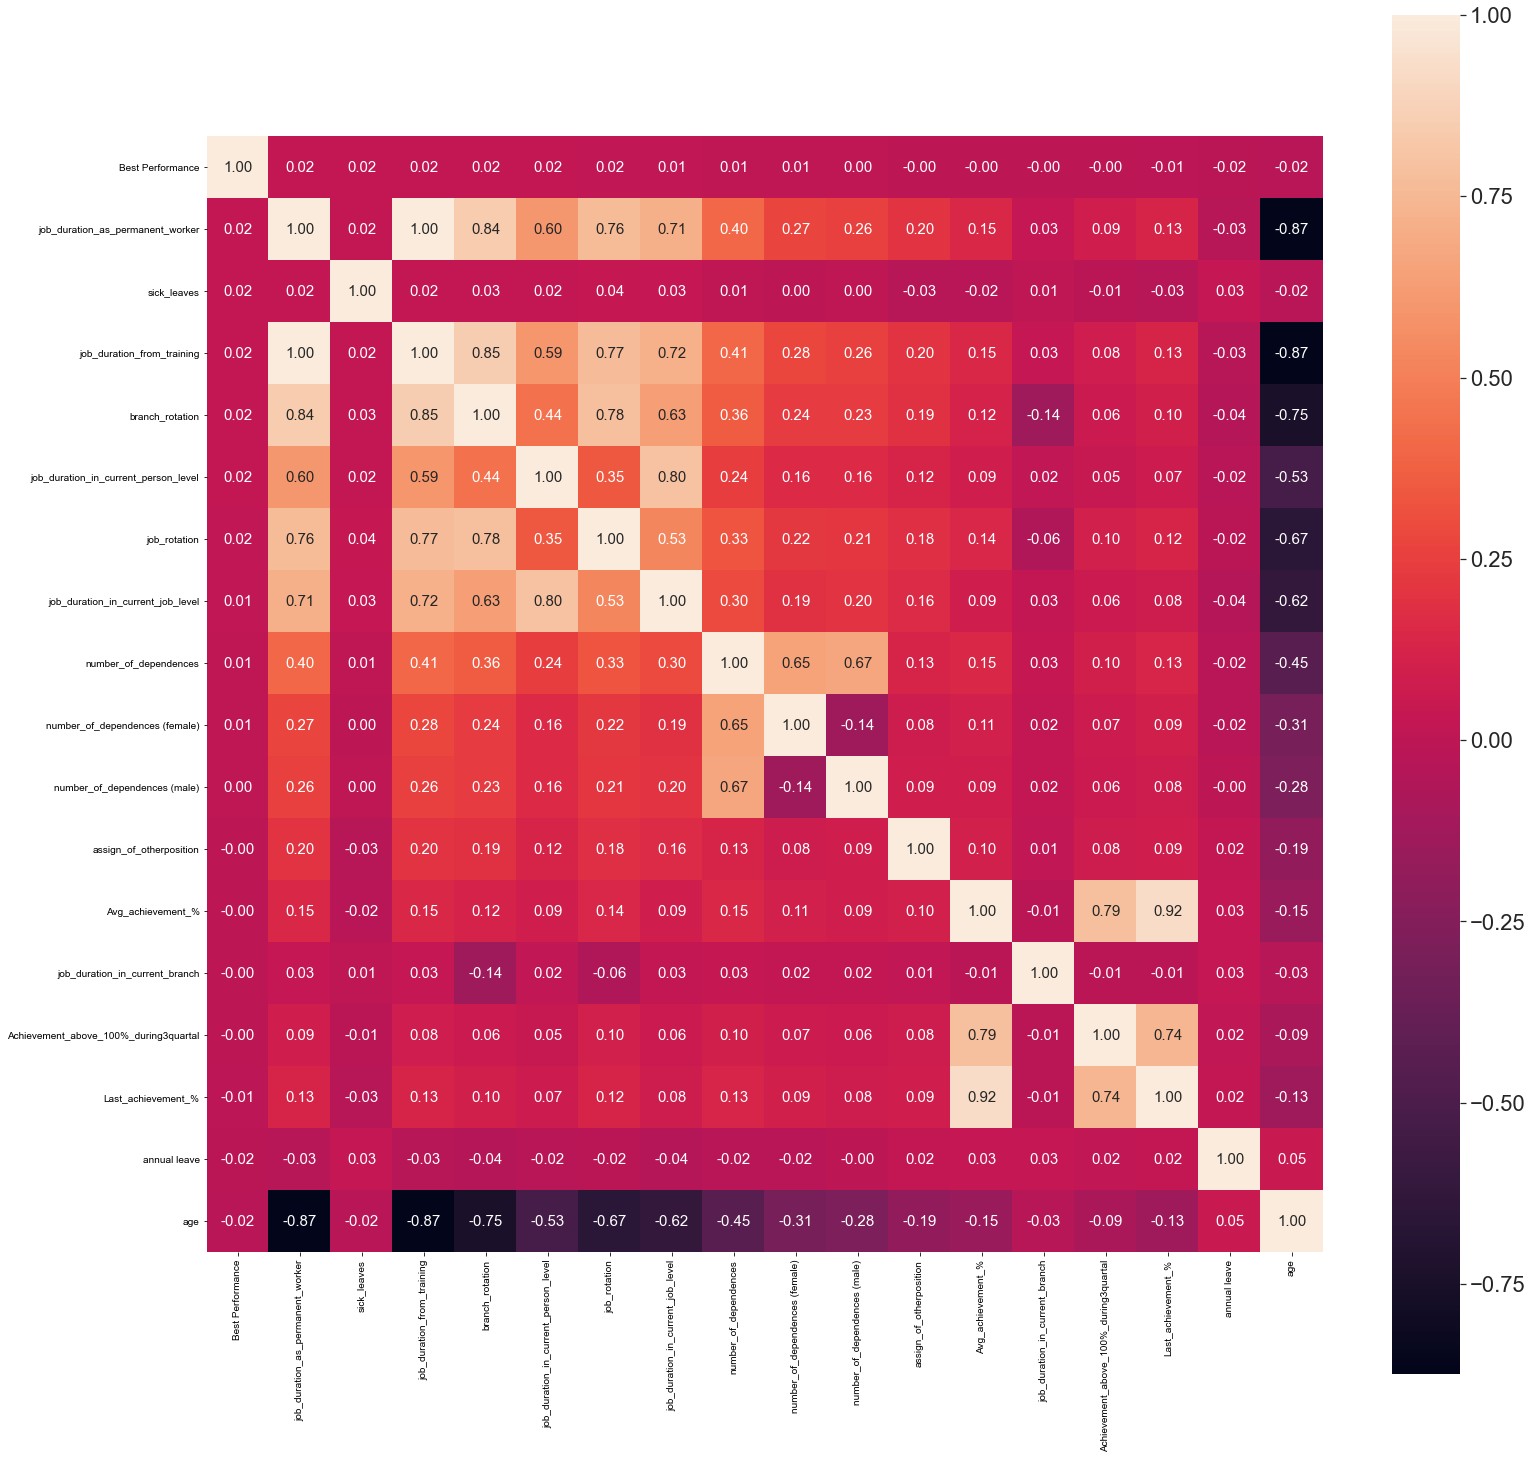

In [33]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(25,25))
k = 26
cols = corrmat.nlargest(k, 'Best Performance')['Best Performance'].index #cols for correlations
cm = np.corrcoef(train[cols].values.T,)
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\Dimas AR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


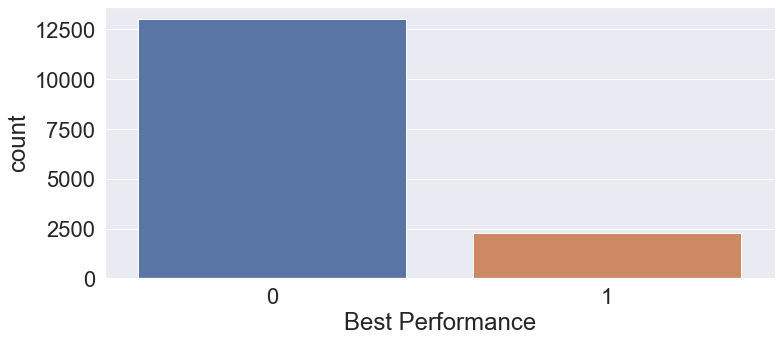

In [34]:
f, ax = plt.subplots(figsize=(12, 5))
g = sns.countplot(train['Best Performance'])
g.set_xticklabels(['0','1'])
plt.show()

In [35]:
train.select_dtypes(include='object').columns

Index(['job_level', 'person_level', 'Employee_type', 'gender',
       'marital_status_maried(Y/N)', 'Education_level', 'achievement_target_1',
       'achievement_target_2', 'achievement_target_3'],
      dtype='object')

In [36]:
def feature_type_split(data, special_list=[]):
    cat_list = []
    dis_num_list = []
    num_list = []
    for i in data.columns.tolist():
        if data[i].dtype == 'object':
            cat_list.append(i)
        elif data[i].nunique() < 25:
            dis_num_list.append(i)
        else:
            num_list.append(i)
    return cat_list, dis_num_list, num_list
cat_list, dis_num_list, num_list = feature_type_split(train) 

In [37]:
print(str(len(cat_list)),'categorical features:', cat_list)
print('-----------------------------------------')
print(str(len(dis_num_list)),'discrete numerical features:',dis_num_list)
print('-----------------------------------------')
print(str(len(num_list)),'continuous numerical features:',num_list)

9 categorical features: ['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'achievement_target_1', 'achievement_target_2', 'achievement_target_3']
-----------------------------------------
8 discrete numerical features: ['number_of_dependences', 'number_of_dependences (male)', 'number_of_dependences (female)', 'branch_rotation', 'job_rotation', 'annual leave', 'Best Performance', 'Achievement_above_100%_during3quartal']
-----------------------------------------
10 continuous numerical features: ['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'job_duration_as_permanent_worker', 'job_duration_from_training', 'assign_of_otherposition', 'sick_leaves', 'Avg_achievement_%', 'Last_achievement_%']


In [38]:
train.nunique()

job_level                                    4
job_duration_in_current_job_level          101
person_level                                 8
job_duration_in_current_person_level        79
job_duration_in_current_branch              71
Employee_type                                3
gender                                       2
age                                         36
marital_status_maried(Y/N)                   2
number_of_dependences                        6
number_of_dependences (male)                 5
number_of_dependences (female)               5
Education_level                              6
job_duration_as_permanent_worker            32
job_duration_from_training                  32
branch_rotation                             20
job_rotation                                15
assign_of_otherposition                     28
annual leave                                21
sick_leaves                                 48
Best Performance                             2
Avg_achieveme

## Feature Engineering

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder, OneHotEncoder

In [40]:
cat_cols = ['job_level', 'person_level', 'Employee_type', 'gender',
           'marital_status_maried(Y/N)', 'Education_level', 'achievement_target_1',
           'achievement_target_2', 'achievement_target_3']

#### OneHotEncode

In [41]:
def ordinal_encoder(input_df, encoder_dict=None):
    """ Process a dataframe into a form useable by LightGBM """
    categorical_feats = input_df.columns[input_df.dtypes == 'object']
    for feat in categorical_feats:
        encoder = OrdinalEncoder()
        input_df[feat] = encoder.fit_transform(input_df[feat].fillna('NULL'))
    return input_df, categorical_feats.tolist(), encoder_dict
train, categorical_feats, encoder_dict = ordinal_encoder(train)

def ordinal_encoder(input_df, encoder_dict=None):
    """ Process a dataframe into a form useable by LightGBM """
    categorical_feats = input_df.columns[input_df.dtypes == 'object']
    for feat in categorical_feats:
        encoder = OrdinalEncoder()
        input_df[feat] = encoder.fit_transform(input_df[feat].fillna('NULL'))
    return input_df, categorical_feats.tolist(), encoder_dict
test, categorical_feats, encoder_dict = ordinal_encoder(test)

In [42]:
train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,1,8.00,1,8.00,0.50,1,1,1964,1,3,...,0,8,0,0,68.85,72.53,0.0,1,1,1
1,2,5.17,2,2.00,1.25,1,2,1979,1,3,...,9,3,0,0,94.81,101.13,3.0,1,2,1
2,2,1.83,3,1.83,1.50,1,2,1980,1,1,...,0,6,0,0,72.82,71.30,0.0,2,1,2
3,2,7.92,2,4.00,0.17,1,2,1984,1,0,...,0,3,0,0,86.89,90.09,2.0,1,2,2
4,2,1.83,3,1.83,2.08,1,2,1984,1,1,...,11,2,1,1,95.17,100.72,2.0,3,3,2


In [43]:
train.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'gender', 'age',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)',
       'Education_level', 'job_duration_as_permanent_worker',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Best Performance', 'Avg_achievement_%', 'Last_achievement_%',
       'Achievement_above_100%_during3quartal', 'achievement_target_1',
       'achievement_target_2', 'achievement_target_3'],
      dtype='object')

In [44]:
X = train[['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'gender', 'age',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)',
       'Education_level', 'job_duration_as_permanent_worker',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Avg_achievement_%', 'Last_achievement_%',
       'Achievement_above_100%_during3quartal', 'achievement_target_1',
       'achievement_target_2', 'achievement_target_3']]

y = train[['Best Performance']]
X_pred = test

## Model #1 (LightGBM + StratifiedKfold)

In [45]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import time

In [46]:
X = X.astype({col: 'int64' for col in X.select_dtypes('int32').columns})
X_pred = X_pred.astype({col: 'int64' for col in X_pred.select_dtypes('int32').columns})

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15278 entries, 0 to 22004
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              15278 non-null  int64  
 1   job_duration_in_current_job_level      15278 non-null  float64
 2   person_level                           15278 non-null  int64  
 3   job_duration_in_current_person_level   15278 non-null  float64
 4   job_duration_in_current_branch         15278 non-null  float64
 5   Employee_type                          15278 non-null  int64  
 6   gender                                 15278 non-null  int64  
 7   age                                    15278 non-null  int64  
 8   marital_status_maried(Y/N)             15278 non-null  int64  
 9   number_of_dependences                  15278 non-null  int64  
 10  number_of_dependences (male)           15278 non-null  int64  
 11  nu

In [48]:
folds = StratifiedKFold(n_splits=5,random_state=6)
oof_preds = np.zeros(X.shape[0])
sub_preds = np.zeros(X_pred.shape[0])

C:\Users\Dimas AR\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [49]:
start = time.time()
valid_score = 0
for n_fold, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    trn_x, trn_y = X.iloc[trn_idx], y.iloc[trn_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]    
    
    train_data = lgb.Dataset(data=trn_x, label=trn_y,categorical_feature=categorical_feats)
    valid_data = lgb.Dataset(data=val_x, label=val_y)
    
    param = {'application':'binary','num_iterations':4000, 'learning_rate':0.05, 'num_leaves':24,
             'feature_fraction':0.8, 'bagging_fraction':0.9, 'lambda_l1':0.1, 'lambda_l2':0.1, 'min_split_gain':0.01, 
             'early_stopping_round':100, 'max_depth':7, 'min_child_weight':40, 'metric':'auc'}
    lgb_es_model = lgb.train(param, train_data, valid_sets=[train_data, valid_data], verbose_eval=100, 
                             categorical_feature=categorical_feats) 
    
    oof_preds[val_idx] = lgb_es_model.predict(val_x, num_iteration=lgb_es_model.best_iteration)
    sub_preds += lgb_es_model.predict(X_pred, num_iteration=lgb_es_model.best_iteration) / folds.n_splits
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx])))
    valid_score += roc_auc_score(val_y, oof_preds[val_idx])

print('valid score:', str(round(valid_score/folds.n_splits,4)))

end = time.time()
print('training time:', str(round((end - start)/60)), 'mins')

C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Education_level', 'Employee_type', 'achievement_target_1', 'achievement_target_2', 'achievement_target_3', 'gender', 'job_level', 'marital_status_maried(Y/N)', 'person_level']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Referenc

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1821, number of negative: 10401
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the train set: 12222, number of used features: 26
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148994 -> initscore=-1.742516
[LightGBM] [Info] Start training from score -1.742516
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Education_level', 'Employee_type', 'achievement_target_1', 'achievement_target_2', 'achievement_target_3', 'gender', 'job_level', 'marital_status_maried(Y/N)', 'person_level']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Referenc

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1821, number of negative: 10401
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 12222, number of used features: 26
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148994 -> initscore=-1.742516
[LightGBM] [Info] Start training from score -1.742516
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Education_level', 'Employee_type', 'achievement_target_1', 'achievement_target_2', 'achievement_target_3', 'gender', 'job_level', 'marital_status_maried(Y/N)', 'person_level']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Referenc

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1820, number of negative: 10402
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 986
[LightGBM] [Info] Number of data points in the train set: 12222, number of used features: 26
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148912 -> initscore=-1.743162
[LightGBM] [Info] Start training from score -1.743162
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Education_level', 'Employee_type', 'achievement_target_1', 'achievement_target_2', 'achievement_target_3', 'gender', 'job_level', 'marital_status_maried(Y/N)', 'person_level']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Referenc

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1821, number of negative: 10402
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 982
[LightGBM] [Info] Number of data points in the train set: 12223, number of used features: 26
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148981 -> initscore=-1.742612
[LightGBM] [Info] Start training from score -1.742612
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[400]	training's auc: 0.797934	valid_1's auc: 0.571888
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Education_level', 'Employee_type', 'achievement_target_1', 'achievement_target_2', 'achievement_target_3', 'gender', 'job_level', 'marital_status_maried(Y/N)', 'person_level']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
C:\Users\Dimas AR\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Referenc

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_score(val_y, oof_preds[val_idx])

0.6039847844463229

In [51]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(val_y, oof_preds[val_idx])

In [52]:
random_probs = [0 for i in range(len(val_y))]
p_fpr, p_tpr, _ = roc_curve(val_y, random_probs, pos_label=1)
auc_bench = roc_auc_score(val_y, oof_preds[val_idx])
auc = roc_auc_score(val_y, oof_preds[val_idx])
print('LGBM AUC: {:.4f}'.format(auc))

LGBM AUC: 0.6040


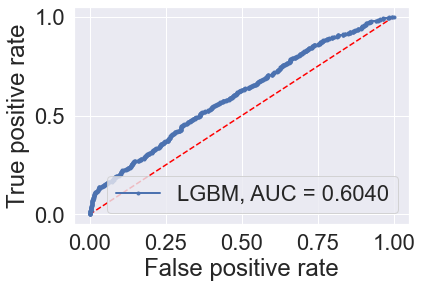

In [53]:
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
plt.plot(fpr, tpr, marker='.', linewidth=2, label='LGBM, AUC = 0.6040')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate') 

# show the plot
plt.legend()
plt.show()

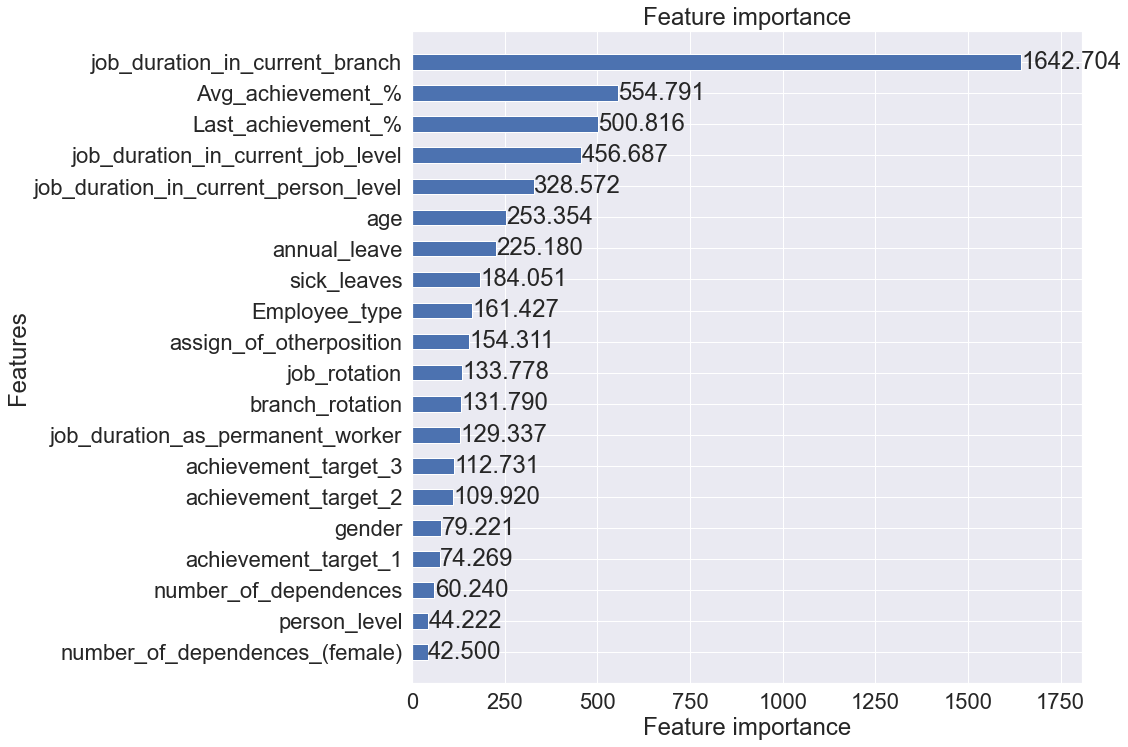

In [54]:
lgb.plot_importance(lgb_es_model, height=0.5, max_num_features=20, ignore_zero = False, figsize = (12,12), importance_type ='gain')

In [55]:
output = pd.DataFrame({'index':test.index, 'Best Performance': sub_preds})
output.to_csv('BRI.csv', index=False)

In [56]:
output.head()

,index,Best Performance
0,0,0.115565
1,1,0.120049
2,2,0.160834
3,3,0.186605
4,4,0.106368


## Model #2 (Coba Pake Scaling sama SMOTE)

In [57]:
!pip install imbalanced-learn
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN

In [58]:
X = train.drop(columns='Best Performance')
y = train['Best Performance']

In [59]:
average=y.value_counts()[0]
best=y.value_counts()[1]

print('Jumlah karyawan average performance mula-mula :',average)
print('Jumlah karyawan best performance mula-mula    :',best)

Jumlah karyawan average performance mula-mula : 13002
Jumlah karyawan best performance mula-mula    : 2276


## Resampling using SMOTEENN

In [60]:
ratio = average/best
while (ratio <= 0.95)|(ratio >= 1.05):
    X, y = SMOTEENN(random_state = 42).fit_resample(X,y)
    average = y.value_counts()[0]
    best = y.value_counts()[1]
    ratio = average/best

print('Jumlah karyawan average performance setelah resampling :',average)
print('Jumlah karyawan best performance setelah resampling    :',best)

Jumlah karyawan average performance setelah resampling : 11934
Jumlah karyawan best performance setelah resampling    : 12430


C:\Users\Dimas AR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


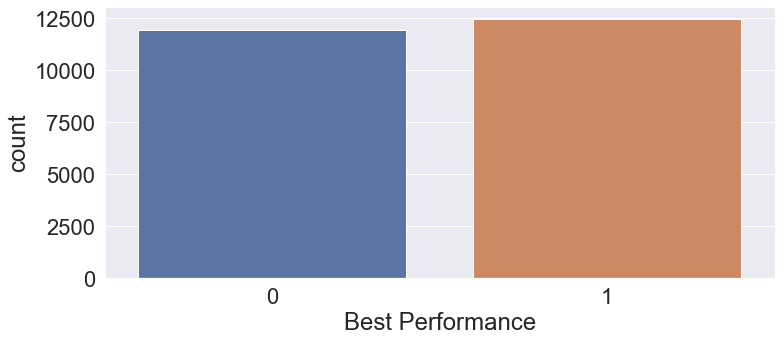

In [69]:
f, ax = plt.subplots(figsize=(12, 5))
g = sns.countplot(y)
g.set_xticklabels(['0','1'])
plt.show()

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

params = {'n_estimators': range(50, 251, 50),
          'max_depth': range(3, 25),
          'max_features': ['sqrt', 'log2', None]}

rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=params,
                          n_iter=20,
                          cv=3,
                          verbose=-1,
                          n_jobs=8)

rf = make_pipeline(rscv)

In [62]:
rf.fit(X, y);

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:  7.6min finished


In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(),X,y,scoring = 'roc_auc')

In [64]:
print('Rerata skor ROC AUC',scores.mean())

Rerata skor ROC AUC 0.967790689277785


In [65]:
model = rf.fit(X, y)

submission = pd.Series(model.predict_proba(test)[:,1],name = 'Best Performance').to_csv('submission3.csv',index_label = 'index')

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:  4.6min finished
